# Iconic images for EAMENA Concepts

Associate one image to a EAMENA concept to illustrate this latter (ex: Threat type = Agricultural/Pastoral). Insert the concept UUID to the image's metadata (ex: 767e9467-3bc2-3f71-9427-0ace387bd843).

<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/concepts_images_threat_type_agricole.png" width = "500">

</center>

The objective is to link the concept image UUID to the RM (ex: node Threat type) and display these images in a `pyvis` interactive graph

## Metadata

In [4]:
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown

Cloning into 'eamena-data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 36 (delta 1), reused 33 (delta 1), pack-reused 0
Receiving objects: 100% (36/36), 3.22 MiB | 5.85 MiB/s, done.
Resolving deltas: 100% (1/1), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.4 MB/s eta 0:00:00


Photographs of iconic cases of threats types (agricole, vandalsim, etc.)

In [5]:
!ls /content/eamena-data/reference-data/concepts/heritage_places/cases

threattype-agricole.jpg     threattype-natural-2.jpg	     threattype-urbanism.jpg
threattype-destruction.jpg  threattype-natural-2-transp.png  threattype-vandalism.jpg
threattype-explosives.png   threattype-natural.jpg
threattype-looting.jpg	    threattype-reuse.jpg


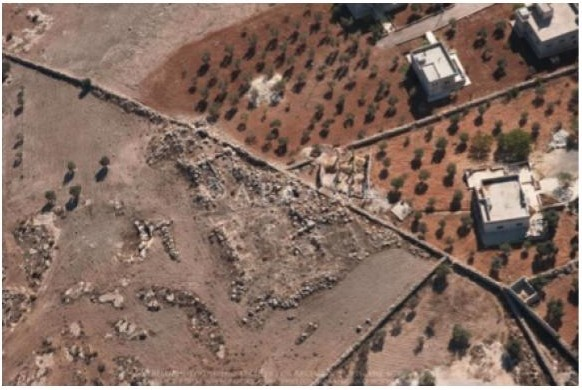

In [6]:
IpImg("/content/eamena-data/reference-data/concepts/heritage_places/cases/threattype-agricole.jpg")

### Read

In [7]:
img_path = '/content/eamena-data/reference-data/concepts/heritage_places/cases/threattype-agricole.jpg'
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
print(img.has_exif)
sorted(img.list_all())

False


[]

### Write

In [8]:
img.make = '767e9467-3bc2-3f71-9427-0ace387bd843' # = Threat type - Vandalism in the RDM
img.model = 'Threat type - Agricultural/Pastoral'
with open('/content/eamena-data/concepts/reference-data/heritage_places/cases/threattype-agricole.jpg', 'wb') as new_image_file:
        new_image_file.write(img.get_file())

### Check

**Threat type - Agricultural/Pastoral**

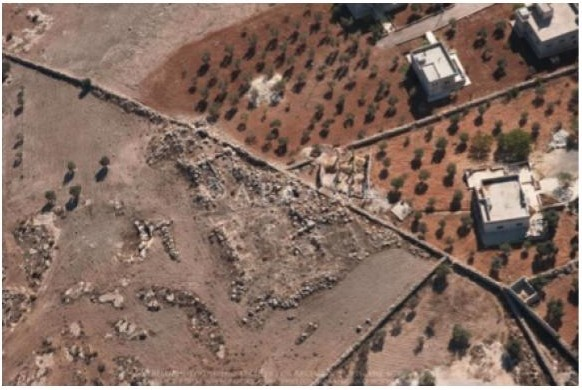

**767e9467-3bc2-3f71-9427-0ace387bd843**

In [9]:
img_path = '/content/eamena-data/concepts/reference-data/heritage_places/cases/threattype-agricole.jpg'
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
# img.get("make")
title = img.get("model")
uuid = img.get("make")
display(Markdown(f"**{title}**"))
display(IpImg("/content/eamena-data/concepts/reference-data/heritage_places/cases/threattype-agricole.jpg"))
display(Markdown(f"**{uuid}**"))

## GUI

TODO: radiobutton to select the image, then show the image with its UUID below and its title above

RadioButtons(description='Select Image:', options=('threattype-vandalism.jpg', 'threattype-explosives.png', 't…

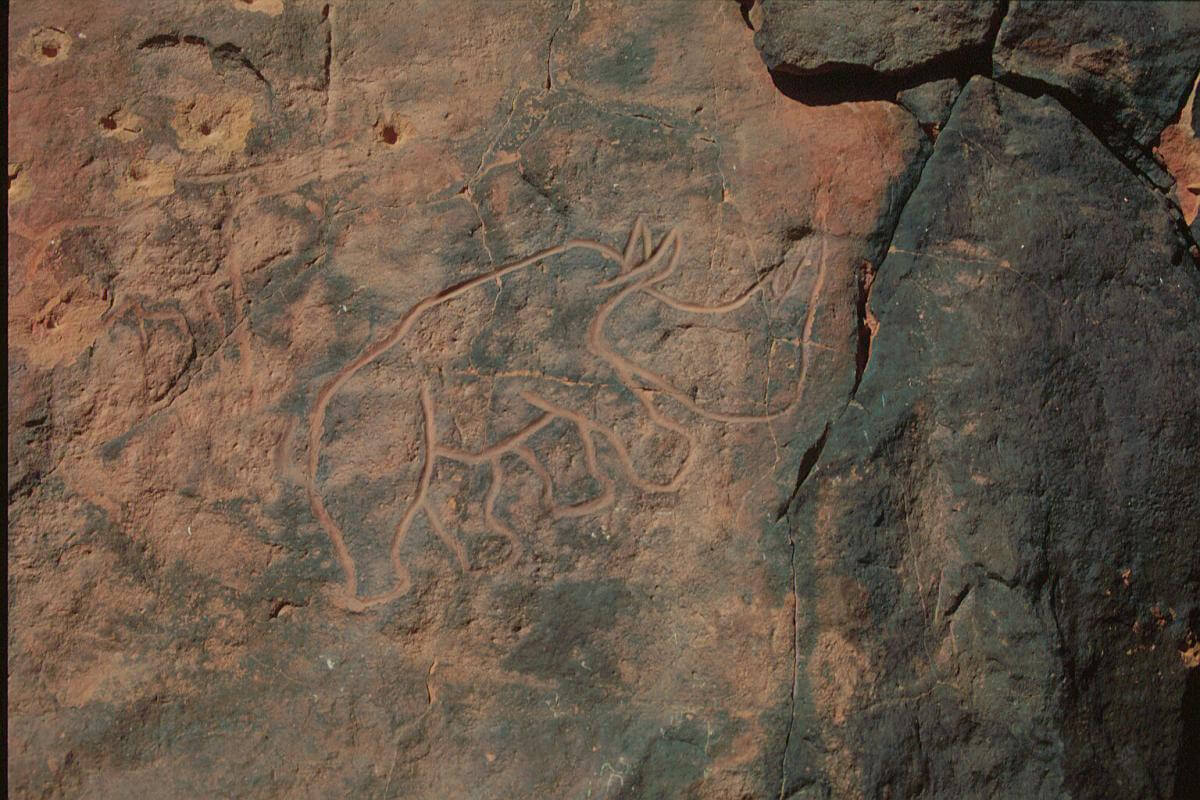

In [ ]:
import os
from IPython.display import display, Image, HTML,clear_output
import ipywidgets as widgets

# Set the path to the folder
folder_path = '/content/reference-data/eamena-data/concepts/heritage_places/cases/'

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Create a radio button widget with the list of image files as options
image_selector = widgets.RadioButtons(
    options=image_files,
    description='Select Image:',
    disabled=False
)

# Function to display the selected image
def display_image(selected_image):
    image_path = os.path.join(folder_path, selected_image)
    display(Image(filename=image_path, width=400, height=400))

# Event handler for changes in the radio button selection
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # clear_image()  # Clear the output area before displaying the new image
        selected_image = change['new']
        display_image(selected_image)

# Attach the event handler to the radio button widget
image_selector.observe(on_change)

# Display the radio button widget
display(image_selector)

# Display the initial image (first image in the list)
initial_image = image_files[0]
display_image(initial_image)